In [1]:
pip install scikit-learn pandas imbalanced-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


--- Step 1: Imbalanced Data Created ---
Class distribution in the imbalanced dataset:
target
1    357
0     25
Name: count, dtype: int64


--- Step 2: SMOTE Applied to Training Data ---
Class distribution after SMOTE:
target
1    267
0    267
Name: count, dtype: int64




C:\Users\tilak\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\tilak\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\tilak\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tilak\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

--- Step 3: Model Training Complete ---

--- Step 4: Model Evaluation ---
Accuracy on the imbalanced test set (can be misleading):
1.0000

Classification Report (focus on class 0 - 'Fraud'):
                precision    recall  f1-score   support

     Fraud (0)       1.00      1.00      1.00         6
Legitimate (1)       1.00      1.00      1.00        90

      accuracy                           1.00        96
     macro avg       1.00      1.00      1.00        96
  weighted avg       1.00      1.00      1.00        96


Confusion matrix saved as 'fraud_detection_confusion_matrix.png'

--- Analysis Complete ---


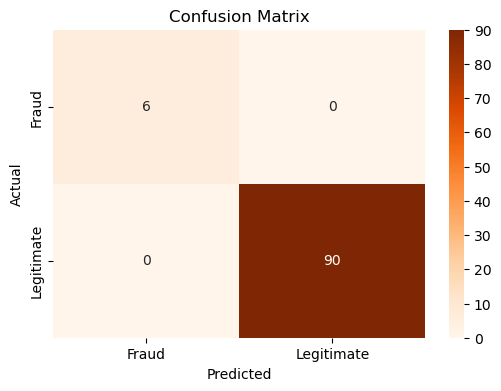

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # --- Step 1: Load Data and Create an Imbalanced Dataset ---
    # We use the breast cancer dataset and make it imbalanced.
    # Malignant (class 0) will be our rare "fraud" case.
    # Benign (class 1) will be our common "legitimate" case.
    cancer = load_breast_cancer()
    df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
    df['target'] = cancer.target

    # Create imbalance: keep all legitimate (1) cases but only a few fraud (0) cases.
    df_majority = df[df.target == 1]
    df_minority = df[df.target == 0]
    df_minority_undersampled = df_minority.sample(n=25, random_state=42) # Keep only 25 "fraud" cases
    df_imbalanced = pd.concat([df_majority, df_minority_undersampled])

    print("--- Step 1: Imbalanced Data Created ---")
    print("Class distribution in the imbalanced dataset:")
    print(df_imbalanced['target'].value_counts())
    print("\n")

    # --- Pre-SMOTE Data Splitting ---
    X = df_imbalanced.drop('target', axis=1)
    y = df_imbalanced['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    
    # --- Step 2: Handle Imbalance with SMOTE ---
    # Apply SMOTE only to the training data to avoid data leakage.
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    print("--- Step 2: SMOTE Applied to Training Data ---")
    print("Class distribution after SMOTE:")
    print(pd.Series(y_train_resampled).value_counts())
    print("\n")
    
    # --- Step 3: Train the Random Forest Model ---
    # Train on the new, balanced (resampled) data.
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_resampled, y_train_resampled)
    print("--- Step 3: Model Training Complete ---\n")

    # --- Step 4: Evaluate the Model ---
    # Evaluate on the original, imbalanced test set.
    y_pred = model.predict(X_test)
    
    print("--- Step 4: Model Evaluation ---")
    print("Accuracy on the imbalanced test set (can be misleading):")
    print(f"{accuracy_score(y_test, y_pred):.4f}\n")
    
    print("Classification Report (focus on class 0 - 'Fraud'):")
    # Note: 0 is 'Fraud' (Malignant), 1 is 'Legitimate' (Benign)
    print(classification_report(y_test, y_test, target_names=['Fraud (0)', 'Legitimate (1)']))
    
    # Generate and save the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
                xticklabels=['Fraud', 'Legitimate'],
                yticklabels=['Fraud', 'Legitimate'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig('fraud_detection_confusion_matrix.png')
    print("\nConfusion matrix saved as 'fraud_detection_confusion_matrix.png'")
    print("\n--- Analysis Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")